In [11]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
#sns.set_theme(style="whitegrid", context="paper")
#

## Read data:

In [12]:
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.head(10)
columns = list(df.columns.values)
columns


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinate

## Relative Population:

In [13]:
# df_pop = df.reset_index()
df_pop= df.drop_duplicates(subset='location')
df_pop = df_pop.filter(items=['population', 'location']).set_index('location')
df_pop = df_pop.sort_values(by='population', ascending=False)
df_pop = df_pop[df_pop['population'] > 34000000]

df_pop.drop(
    labels=['Asia', 'World', 'Africa', 'Europe','North America', 'South America', 'European Union'],
    axis=0,
    inplace=True)
df_pop.reset_index( inplace=True)
df_pop = df_pop.drop(range(20,38))
df_pop = df_pop.drop(range(10,18))

df_pop.shape
df_pop.to_csv('rel_population.txt')

#### Plot Relative Population:

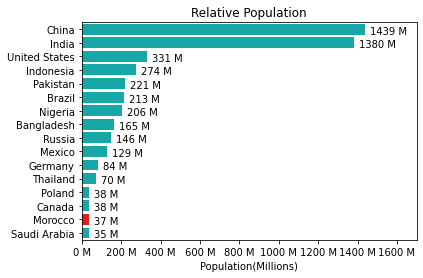

In [14]:
countries = df_pop['location']
colors = ['red' if (x=='Morocco') else 'c' for x in countries]
fig1 = sns.barplot(x=df_pop['population'],
            y=df_pop['location'],
            palette=colors,
            )

def units(x, pos):
    s='{:} M'.format(round(x*1e-6))
    return s
for p in fig1.patches:
    fig1.annotate( '{:} M'.format(round(p.get_width()/1000000)), xy=(p.get_width(), p.get_y()),
                  va='top',xytext=(5, -2), textcoords='offset points',
                  ha='left')
fig1.set_xlim([0,1700000000])
fig1.set_title('Relative Population')
fig1.set_ylabel('')
fig1.set_xlabel('Population(Millions)')
fig1.xaxis.set_major_formatter(units)
plt.style.use({'figure.facecolor':'white'})
plt.savefig('fig1',bbox_inches='tight',)


## Global Deaths

In [15]:
df_deaths = df.filter(items=[ 'date', 'location', 'total_deaths',
                                          'new_deaths', 'total_cases', 'new_cases'])
df_deaths = df_deaths[(df_deaths['location']=='World') | (df_deaths['location']=='Africa')| (df_deaths['location']=='Europe')| (df_deaths['location']=='Asia')| (df_deaths['location']=='North America')| (df_deaths['location']=='Oceania')| (df_deaths['location']=='South America')]
df_deaths = df_deaths[(df_deaths['date']=='2021-03-01')]
df_deaths.head()
df_deaths.to_csv('Global_Deaths.txt')

## Morocco Pre Covid Stats:

In [16]:
df_mor_stats = df[(df['location']=='Morocco') | (df['location']=='Ireland')| (df['location']=='Algeria')| (df['location']=='Egypt')| (df['location']=='Ghana')]
df_mor_stats = df_mor_stats.filter(items=['location', 'population_density',
                                          'gdp_per_capita', 'extreme_poverty','human_development_index',
                                          'hospital_beds_per_thousand', 'cardiovasc_death_rate','life_expectancy',
                                          'diabetes_prevalence', 'aged_70_older'])
df_mor_stats= df_mor_stats.drop_duplicates(subset='location')
df_mor_stats.head()
df_mor_stats.to_csv('mor_stats.txt')

## Mediteranian region map


In [17]:
df_med = df[(df['location']=='Albania')|
            (df['location']=='Algeria')|
            (df['location']=='Bosnia and Herzegovina')|
            (df['location']=='Croatia')|
            (df['location']=='Cyprus')|
            (df['location']=='Egypt')|
            (df['location']=='France')|
            (df['location']=='Greece')|
            (df['location']=='Israel')|
            (df['location']=='Italy')|
            (df['location']=='Lebanon')|
            (df['location']=='Libya')|
            (df['location']=='Malta')|
            (df['location']=='Morocco')|
            (df['location']=='Monaco')|
            (df['location']=='Montenegro')|
            (df['location']=='Northern Cyprus')|
            (df['location']=='Palestine')|
            (df['location']=='San Marino')|
            (df['location']=='Slovenia')|
            (df['location']=='Spain')|
            (df['location']=='Syria')|
            (df['location']=='Tunisia')|
            (df['location']=='Turkey')]
df_med = df_med[(df_med['date'] == '2021-03-01')]
df_med = df_med.filter(items=['date','location', 'total_deaths', 'total_cases','total_cases_per_million', 'total_deaths_per_million', 'population_density','gdp_per_capita'])
df_med.tail()
df_med.to_csv('med_map_stats.txt')


Morocco v Ireland : Cases and deaths

In [18]:
df_mor_deaths_cases = df[(df['location']=='Morocco')| (df['location']=='Ireland')]
df_mor_deaths_cases = df_mor_deaths_cases[(df_mor_deaths_cases['date'] == '2021-03-01')]
df_mor_deaths_cases = df_mor_deaths_cases.filter(items=['date','location', 'total_deaths', 'total_cases','total_cases_per_million', 'total_deaths_per_million'])
df_mor_deaths_cases.tail()
df_mor_deaths_cases.to_csv('moroccoVireland.txt')

In [19]:
#palette = {c: 'red' if c=='Morocco' else 'grey' for c in df_date_less .location.unique() }
#fig3 = sns.lineplot(x='date', y='new_deaths_per_million', hue='location',palette=palette, data=df_date_less)


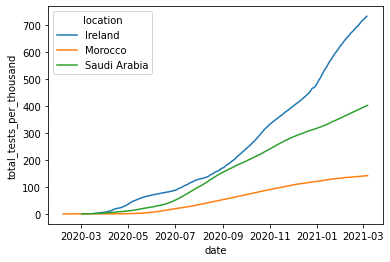

In [20]:
df_testing = df[(df['location']=='Morocco') | (df['location']=='Ireland')| (df['location']=='Saudi Arabia')]
df_testing = df_testing.filter(items=['date','location', 'new_tests', 'new_tests_per_thousand ', 'total_tests','total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand'])


fig4 = sns.lineplot(x='date', y='total_tests_per_thousand', hue='location',color='grey', data=df_testing)
fig4
df_testing.shape
df_testing.to_csv('testing.txt')

# European Cases : Waves

In [21]:
df_eu = df[(df['location']=='Ireland') | (df['location']=='France')| (df['location']=='Italy')| (df['location']=='United Kingdom')| (df['location']=='Spain')| (df['location']=='Germany')| (df['location']=='Europe')]
df_eu = df_eu[(df_eu['new_cases_per_million'] > 0)]
df_eu = df_eu.filter(items=['date','location', 'new_cases_per_million',])
for country in df_eu['location'].unique():
    df_eu[country] = np.where(df_eu['location'] == country, df_eu['new_cases_per_million'], False)
# df_eu = df_eu.drop_duplicates(subset='date')
df_eu= df_eu.groupby(['date'], as_index=False).sum()

df_eu.to_csv('eu.txt')
df_eu.head(10)

,date,new_cases_per_million,Europe,France,Germany,Ireland,Italy,Spain,United Kingdom
0,2020-01-24,0.034,0.003,0.031,0.000,0.0,0.000,0.000,0.000
1,2020-01-25,0.016,0.001,0.015,0.000,0.0,0.000,0.000,0.000
2,2020-01-27,0.013,0.001,0.000,0.012,0.0,0.000,0.000,0.000
3,2020-01-28,0.056,0.005,0.015,0.036,0.0,0.000,0.000,0.000
4,2020-01-29,0.018,0.003,0.015,0.000,0.0,0.000,0.000,0.000
5,2020-01-31,0.083,0.009,0.000,0.012,0.0,0.033,0.000,0.029
6,2020-02-01,0.080,0.008,0.015,0.036,0.0,0.000,0.021,0.000
7,2020-02-02,0.027,0.003,0.000,0.024,0.0,0.000,0.000,0.000
8,2020-02-03,0.123,0.011,0.000,0.024,0.0,0.000,0.000,0.088
9,2020-02-04,0.001,0.001,0.000,0.000,0.0,0.000,0.000,0.000


 ### EU + Mor cases

In [22]:
df_eu_mor = df[(df['location']=='Morocco') | (df['location']=='Europe')]
df_eu_mor = df_eu_mor.filter(items=['date','location', 'new_cases_per_million',])
for country in df_eu_mor['location'].unique():
    df_eu_mor[country] = np.where(df_eu_mor['location'] == country, df_eu_mor['new_cases_per_million'], False)

df_eu_mor= df_eu_mor.groupby(['date'], as_index=False).sum()
df_eu_mor.to_csv('eu_mor.txt')
df_eu_mor.head(10)

,date,new_cases_per_million,Europe,Morocco
0,2020-01-23,0.000,0.000,0.0
1,2020-01-24,0.003,0.003,0.0
2,2020-01-25,0.001,0.001,0.0
3,2020-01-26,0.000,0.000,0.0
4,2020-01-27,0.001,0.001,0.0
5,2020-01-28,0.005,0.005,0.0
6,2020-01-29,0.003,0.003,0.0
7,2020-01-30,0.000,0.000,0.0
8,2020-01-31,0.009,0.009,0.0
9,2020-02-01,0.008,0.008,0.0


 ### EU + Mor cases + stringency_index

In [23]:
df_eu_mor_str = df[(df['location']=='Morocco') | (df['location']=='Spain')]
df_eu_mor_str = df_eu_mor_str.filter(items=['date','location', 'new_cases_per_million','stringency_index'])
for country in df_eu_mor_str['location'].unique():
    df_eu_mor_str[country+'_cases'] = np.where(df_eu_mor_str['location'] == country, df_eu_mor_str['new_cases_per_million'], False)
    df_eu_mor_str[country+'_stringency'] = np.where(df_eu_mor_str['location'] == country, df_eu_mor_str['stringency_index'], False)
df_eu_mor_str= df_eu_mor_str.groupby(['date'], as_index=False).sum()
df_eu_mor_str.head(80)
df_eu_mor_str.to_csv('spn_mor_str.txt')


In [24]:
df_euro = df[(df['location']=='Ireland') | (df['location']=='France')| (df['location']=='Italy')| (df['location']=='United Kingdom')| (df['location']=='Spain')| (df['location']=='Germany')| (df['location']=='Europe')]
df_euro = df_euro[(df_euro['new_cases_per_million'] > 0)]
#select_eu_countries = df_euro.location.unique()
# print(select_eu_countries)
# plt.figure(figsize=(600,400))
df_euro = df_euro.filter(items=['date','location', 'new_cases_per_million','new_cases_smoothed_per_million'])
# for country in select_eu_countries:
palette = {c: 'red' if c=='Europe' else 'grey' for c in df_euro.location.unique() }
#Fig5 = sns.lineplot(x='date', y='new_cases_per_million', hue='location', palette=palette, data=df_euro)
#Fig5
#df_euro.head()
eu_countries = df_euro['location'].unique()
#len(eu_countries)
#df_euro.to_csv('euro.txt')
df_euro.shape


(2612, 4)